In [1]:
import cv2
im = cv2.imread("images/Image7.png")
import sys
import numpy as np
from matplotlib import pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
#im=im/255.0
#cv2.imshow('Original', im) 
#cv2.waitKey(0) 
#print(im/255.0)
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
resized_image = cv2.resize(gray_image, (28, 28))
resized_image=np.reshape(resized_image,(28,28,1))
#cv2.imshow('Original', gray_image) 
#cv2.waitKey(0) 
#cv2.imshow(' ',resized_image)
#cv2.waitKey(0)
filehandler=open('minMaxScaler.pickle','rb')
minMaxScaler=pickle.load(filehandler)
resized_image=resized_image/255.0
tlen=10
#print(resized_image)


In [2]:

'''

model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.UpSampling2D((2, 2))
'''
#tlen=3
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(8,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.Dense(8,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
#model.add(tf.keras.layers.Dense(15,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.Dense(tlen,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_crossentropy'])
model.summary()

c:\Users\tecyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
dtrainx=np.array([resized_image])
s=(resized_image.shape[0]*resized_image.shape[1])
s2=(resized_image.shape[0],resized_image.shape[1])
resized_image=np.reshape(resized_image,s)
dtrainx2=np.array([resized_image])
#dtrainx2=minMaxScaler.transform(dtrainx2)
dtrainx=np.reshape(dtrainx2,(len(dtrainx2),s2[0],s2[1],1))
#dtrainx=np.array([resized_image])
print(dtrainx.shape)
print(resized_image.shape)
#dtrainx=minMaxScaler.transform(dtrainx)
dtrainy=np.array(np.array([[0.]]))
print(dtrainy)

(1, 28, 28, 1)
(784,)
[[0.]]


In [4]:
dtrainx[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [5]:
model.fit(dtrainx,dtrainy,epochs=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step - accuracy: 1.0000 - loss: 1.9624 - sparse_categorical_crossentropy: 1.9624


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[4.5159613e-04 1.2713212e-03 4.6499130e-01 1.6316852e-04 3.2326611e-07
 2.9671879e-04 5.3269833e-01 6.9142887e-05 5.1455550e-05 6.6292555e-06]
0.53269833
(488, 488, 3)


<Figure size 640x480 with 0 Axes>

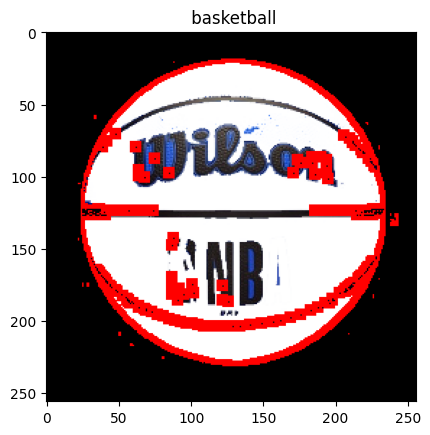

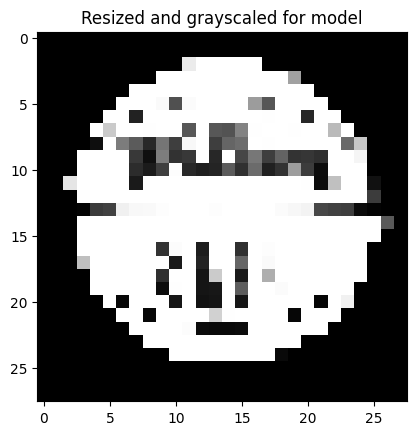

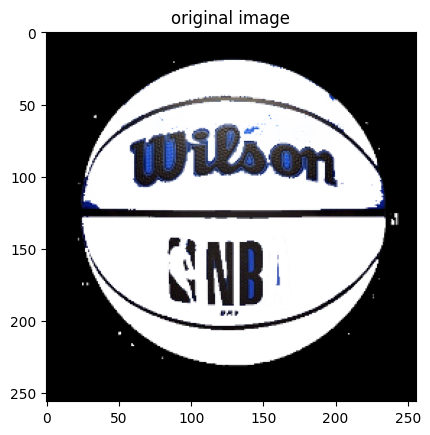

<Figure size 640x480 with 0 Axes>

In [6]:
outp=[' airplane', ' alarm clock', ' ambulance', ' anvil', ' axe', 
      ' banana', ' basketball', ' bed', ' bicycle', ' The Eiffel Tower']







model.load_weights('best_weightsFinal.keras')
a=model.predict(dtrainx)[0]
print(a)
print(a[np.argmax(a)])
title=outp[np.argmax(a)]
plt.title(title)
print(im.shape)
im=cv2.resize(im, (256, 256))
im2=np.array(im)
i=0
j=0
jh=[[i+1,j+1],[i-1,j-1],[i-1,j],[i,j-1],[i+1,j],[i,j+1]]
jh=[]
for rr in range(-2,2):
      for rj in range(-4,4):
          if rr==0 and rj==0:
              continue
          jh.append([i+rr,j+rj])
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        k=im2[i,j]
        if(k[0]<20 and k[1]<20 and k[2]<20):
                for ah in jh:
                     i2=ah[0]+i
                     j2=ah[1]+j
                     if(i2<im.shape[0] and j2<im.shape[1] and i2>-1 and j2>-1): 
                        z1=im2[i2,j2,0]
                        z2=im2[i2,j2,1]
                        z3=im2[i2,j2,2]
                        if z1>0 and z2>0 and z3>0:
                             #print(z1,z2,z3)
                             im2[i2,j2,0]=255
                             im2[i2,j2,1]=0
                             im2[i2,j2,2]=0
                              
plt.imshow(im2)
plt.figure()
plt.title('Resized and grayscaled for model')
plt.imshow(dtrainx[0],cmap='gray')
plt.figure()
plt.title('original image')
plt.imshow(im)
plt.figure()

#plt.imshow(resized_image, cmap='gray')